# Ball Latent test

In [9]:
import os
os.add_dll_directory(
    "C:\\Program Files\\NVIDIA GPU Computing Toolkit\\CUDA\\v11.4\\bin")

<AddedDllDirectory('C:\\Program Files\\NVIDIA GPU Computing Toolkit\\CUDA\\v11.4\\bin')>

In [1]:
import pickle
import keras
import numpy as np
from keras import layers, Model, Input
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.utils.vis_utils import plot_model



In [2]:
import tensorflow as tf

devices = tf.config.list_physical_devices('GPU')

if len(devices) < 1:
    raise Exception("Cannot initialize GPU")

print("GPU configured correctly")

GPU configured correctly


## Loading generated dataset

In [3]:
ball_latents, ball_coords = pickle.load(open('./balls_latent_ds.p', 'rb'))

ball_latent_train, ball_latent_test, ball_coords_train, ball_coords_test = train_test_split(
    ball_latents.numpy(), 
    ball_coords.numpy(), 
    test_size=0.2
)

## Model for Ball latent

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 12)]              0         
_________________________________________________________________
dense (Dense)                (None, 100)               1300      
_________________________________________________________________
batch_normalization (BatchNo (None, 100)               400       
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 202       
Total params: 1,902
Trainable params: 1,702
Non-trainable params: 200
_________________________________________________________________


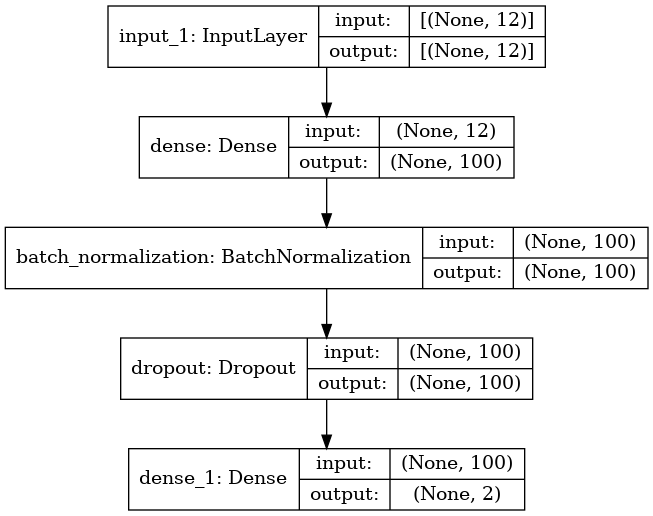

In [4]:
ip = Input((ball_latents.shape[1]))

x = layers.Dense(100, activation='relu')(ip)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.15)(x)
out = layers.Dense(ball_coords.shape[1], activation='relu')(x)

ball_model = Model(ip, out)
ball_model.compile(optimizer='adam', loss=keras.losses.mean_absolute_error)
ball_model.summary()

plot_model(ball_model, "ball_latent.png", show_shapes=True)

In [5]:
history = ball_model.fit(
    x=ball_latent_train,
    y=ball_coords_train,
    batch_size=128,
    epochs=400,
    validation_data=(ball_latent_test, ball_coords_test)
)

Epoch 1/400
87/87 [==============================] - 1s 4ms/step - loss: 16.6263 - val_loss: 16.8856
Epoch 2/400
87/87 [==============================] - 0s 2ms/step - loss: 12.6247 - val_loss: 14.7233
Epoch 3/400
87/87 [==============================] - 0s 2ms/step - loss: 8.8110 - val_loss: 11.8426
Epoch 4/400
87/87 [==============================] - 0s 2ms/step - loss: 5.8568 - val_loss: 9.2519
Epoch 5/400
87/87 [==============================] - 0s 2ms/step - loss: 4.0651 - val_loss: 7.2547
Epoch 6/400
87/87 [==============================] - 0s 2ms/step - loss: 3.3757 - val_loss: 5.8811
Epoch 7/400
87/87 [==============================] - 0s 2ms/step - loss: 3.0007 - val_loss: 4.9781
Epoch 8/400
87/87 [==============================] - 0s 2ms/step - loss: 2.6857 - val_loss: 4.4292
Epoch 9/400
87/87 [==============================] - 0s 2ms/step - loss: 2.5042 - val_loss: 4.0052
Epoch 10/400
87/87 [==============================] - 0s 2ms/step - loss: 2.3515 - val_loss: 3.4776
Epoc

Text(0, 0.5, 'MAE')

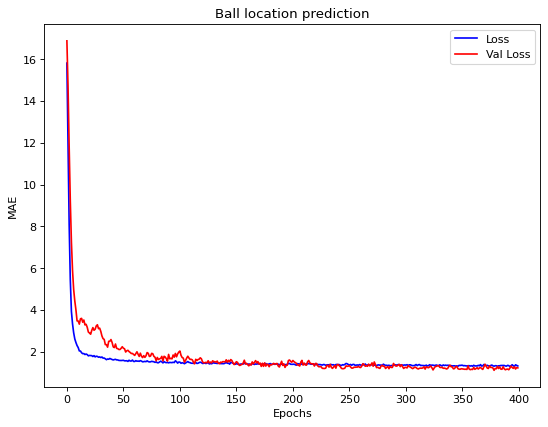

In [7]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8,6), dpi=80)
plt.plot(range(len(loss)), loss, 'b', label='Loss')
plt.plot(range(len(val_loss)), val_loss, 'r', label='Val Loss')
plt.title('Ball location prediction')
plt.legend()
#plt.gca().set_ylim([0,40])
plt.xlabel('Epochs')
plt.ylabel('MAE')